In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score
import numpy as np


from keras.backend import clear_session

import sys  
import os
os.getcwd()

'd:\\Users\\Desktop\\Detection-and-Mitigation-Web-Attack-in-Hybrid-Cloud-using-ML-DL\\Models\\Binary_classification'

In [38]:
sys.path.insert(1, 'D://Users//Desktop//Detection-and-Mitigation-Web-Attack-in-Hybrid-Cloud-using-ML-DL//Data_preprocessing')

import Data_preprocessing

In [39]:
# Assuming df, features_list, and test_type are defined

X = Data_preprocessing.df[Data_preprocessing.features_list].to_numpy()
y = np.stack(Data_preprocessing.df[Data_preprocessing.test_type])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# Print the dataset shapes and class distribution
print("Training set shapes:", X_train.shape, y_train.shape)
print("Test set shapes:", X_test.shape, y_test.shape)
counter = Counter(y_train)
print("Class distribution in training set:", counter)

# Convert labels to integers
y_train = np.array([1 if label == "Malware" else 0 for label in y_train])
y_test = np.array([1 if label == "Malware" else 0 for label in y_test])

Training set shapes: (3526, 24) (3526,)
Test set shapes: (756, 24) (756,)
Class distribution in training set: Counter({'Malware': 1864, 'Benign': 1662})


In [40]:
# Define the SVM model using TensorFlow
svm_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation=None)  # No activation for SVM
])

# Compile the model with hinge loss
svm_model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])

# Train the model with validation data
history = svm_model.fit(X_train, y_train, epochs=1000, batch_size=256, validation_data=(X_test, y_test), verbose=1)


Epoch 1/1000
14/14 [==============================] - 1s 21ms/step - loss: 52.7952 - accuracy: 0.5286 - val_loss: 52.0397 - val_accuracy: 0.5291
Epoch 2/1000
14/14 [==============================] - 0s 17ms/step - loss: 50.6129 - accuracy: 0.5286 - val_loss: 49.8250 - val_accuracy: 0.5291
Epoch 3/1000
14/14 [==============================] - 0s 6ms/step - loss: 48.4227 - accuracy: 0.5286 - val_loss: 47.6209 - val_accuracy: 0.5291
Epoch 4/1000
14/14 [==============================] - 0s 7ms/step - loss: 46.2358 - accuracy: 0.5286 - val_loss: 45.4161 - val_accuracy: 0.5291
Epoch 5/1000
14/14 [==============================] - 0s 6ms/step - loss: 44.0335 - accuracy: 0.5286 - val_loss: 43.2231 - val_accuracy: 0.5291
Epoch 6/1000
14/14 [==============================] - 0s 6ms/step - loss: 41.8593 - accuracy: 0.5286 - val_loss: 41.0059 - val_accuracy: 0.5291
Epoch 7/1000
14/14 [==============================] - 0s 6ms/step - loss: 39.6669 - accuracy: 0.5286 - val_loss: 38.7956 - val_accurac

In [41]:
# Evaluate the model
y_pred = svm_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

24/24 [==============================] - 0s 1ms/step
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00       400

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756



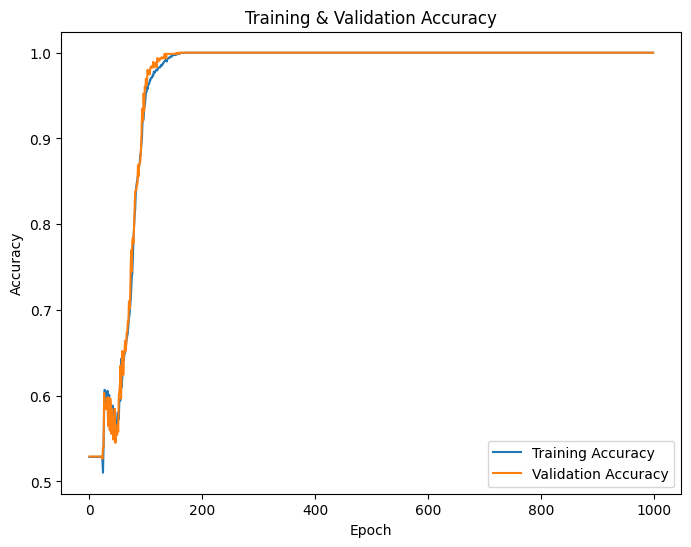

In [42]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

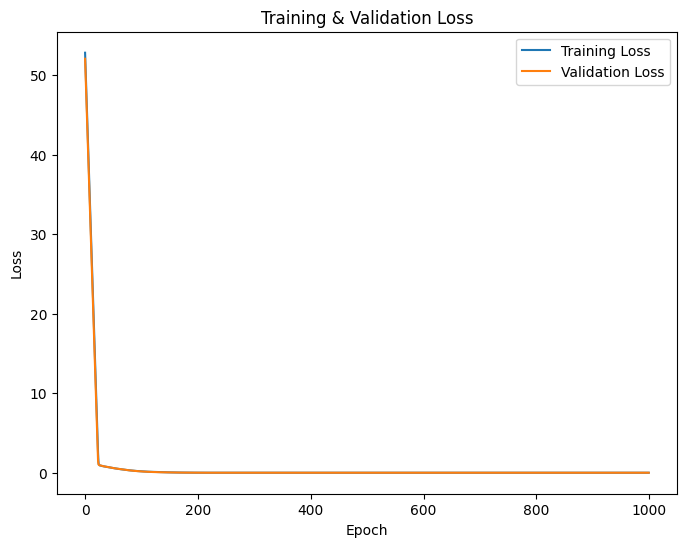

In [43]:
# Plot Training & Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

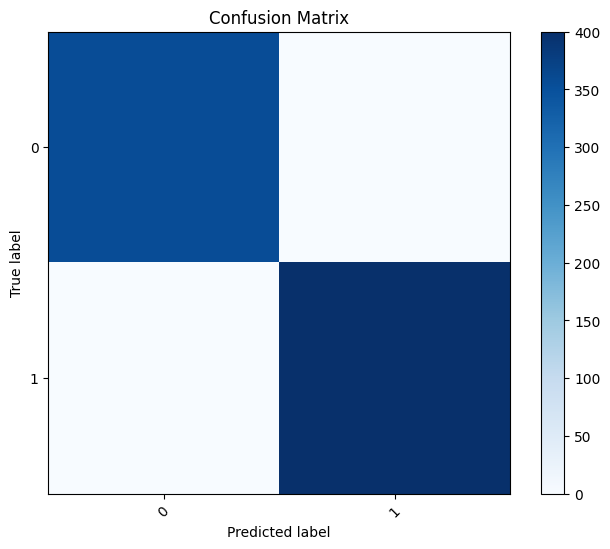

In [44]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = [0, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

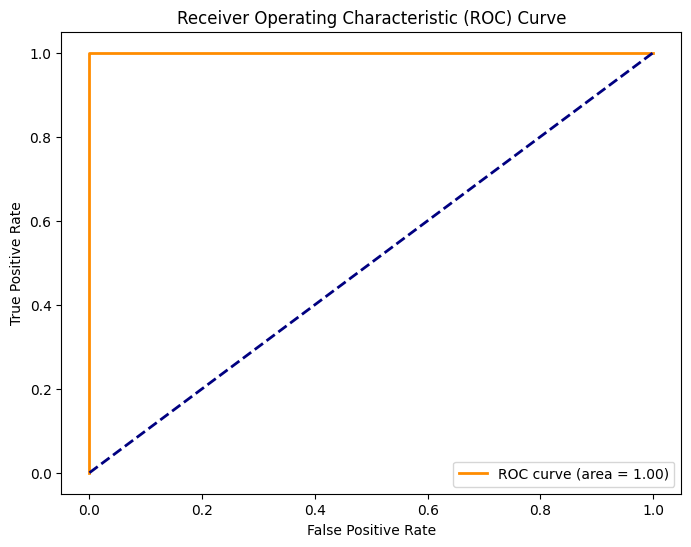

In [45]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()